In [ ]:
!nvidia-smi

In [ ]:
import torch
torch.cuda.is_available()

In [1]:
!git clone https://github.com/gangweiX/IGEV.git

Cloning into 'IGEV'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 214 (delta 43), reused 98 (delta 29), pack-reused 95
Receiving objects: 100% (214/214), 50.85 MiB | 40.55 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In `/content/IGEV/IGEV-Stereo/demo_imgs.py`, change
```
from igev_stereo import IGEVStereo
from utils.utils import InputPadder
```
to
```
from core.igev_stereo import IGEVStereo
from core.utils.utils import InputPadder
```

Also change line 52 to
```
from skimage import io
disp = np.round(disp * 256).astype(np.uint16)
io.imsave(output_directory / f"{file_stem}.png", disp.squeeze().astype(np.uint16))

```
to avoid color-mapping the disparity map.

In [2]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch -c nvidia
!pip install opencv-python
!pip install scikit-image
!pip install tensorboard
!pip install matplotlib
!pip install tqdm
!pip install timm==0.5.4

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 3.9 MB/s eta 0:00:00


# Generate left disparity map

In [ ]:
!python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt /content/eth3d.pth -l IGEV/im0.png -r IGEV/im1.png

Found 1 images. Saving files to demo-output/
100% 1/1 [00:02<00:00,  2.61s/it]


# Generate right disparity map

Found 1 images. Saving files to demo-output/
100% 1/1 [00:02<00:00,  2.51s/it]


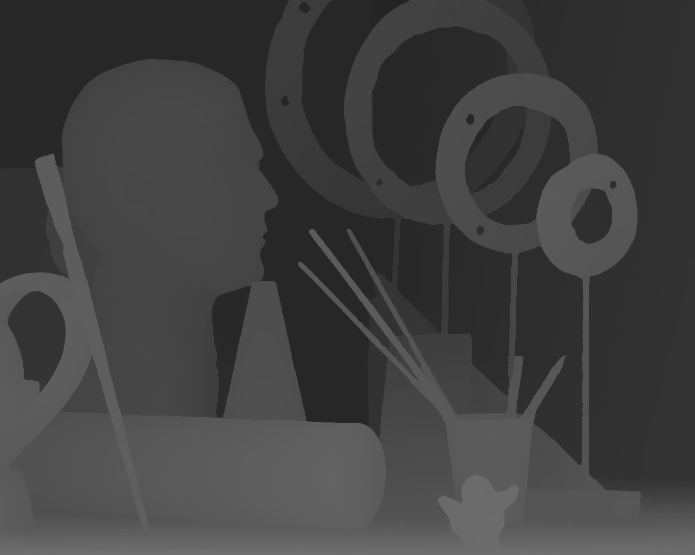

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

'''
Rotate left and right input images
'''
left_img = cv2.imread("/content/IGEV/im0.png")
rotated_left_img = left_img[:, ::-1]
# cv2_imshow(rotated_left_img)
cv2.imwrite("/content/IGEV/im0_rotated.png", rotated_left_img)

right_img = cv2.imread("/content/IGEV/im1.png")
rotated_right_img = right_img[:, ::-1]
# cv2_imshow(rotated_right_img)
cv2.imwrite("/content/IGEV/im1_rotated.png", rotated_right_img)


'''
Generate rotated version of right disparity map
'''
!python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt ./middlebury.pth -l /content/IGEV/im1_rotated.png -r /content/IGEV/im0_rotated.png --max_disp 384
'''
Correct orientation of right disparity map
'''
right_disp_rotated = cv2.imread("/content/demo-output/IGEV.png")
# cv2_imshow(right_disp_rotated)
right_disp = right_disp_rotated[:, ::-1]
cv2_imshow(right_disp)
cv2.imwrite("/content/demo-output/right_disparity.png", right_disp)

# Generate report

In [ ]:
!unzip eval.zip

In [5]:
import cv2
from google.colab import files

imgs = [
    # "art",
    "flowerbed",
    "lilies",
    "statue",
    "sunflowers",
    "tree",
    "trees",
    "woods",
    "roses",
    "rock",
    "peaches",
    "mug",
    "grapes",
]

for img in imgs:
  !python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt /content/middlebury.pth -l /content/test/{img}/{img}_L.png -r /content/test/{img}/{img}_R.png --output_directory /content/test/{img}
  !mv /content/test/{img}/{img}.png /content/test/{img}/left_disparity.png

  left_img = cv2.imread(f"/content/test/{img}/{img}_L.png")
  rotated_left_img = left_img[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/{img}_L_rotated.png", rotated_left_img)
  right_img = cv2.imread(f"/content/test/{img}/{img}_R.png")
  rotated_right_img = right_img[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/{img}_R_rotated.png", rotated_right_img)

  !python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt /content/middlebury.pth -l /content/test/{img}/{img}_R_rotated.png -r /content/test/{img}/{img}_L_rotated.png --output_directory /content/test/{img}
  right_disp_rotated = cv2.imread(f"/content/test/{img}/{img}.png")
  right_disp = right_disp_rotated[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/right_disparity.png", right_disp)
  !rm -f /content/test/{img}/{img}_R_rotated.png
  !rm -f /content/test/{img}/{img}_L_rotated.png
  !rm -f /content/test/{img}/{img}.png

!zip -r test.zip test
files.download(f"test.zip")


Found 1 images. Saving files to /content/test/Australia/
100% 1/1 [00:07<00:00,  7.76s/it]
Found 1 images. Saving files to /content/test/Australia/
100% 1/1 [00:02<00:00,  2.45s/it]
Found 1 images. Saving files to /content/test/AustraliaP/
100% 1/1 [00:02<00:00,  2.93s/it]
Found 1 images. Saving files to /content/test/AustraliaP/
100% 1/1 [00:02<00:00,  2.50s/it]
Found 1 images. Saving files to /content/test/Bicycle2/
100% 1/1 [00:02<00:00,  2.43s/it]
Found 1 images. Saving files to /content/test/Bicycle2/
100% 1/1 [00:02<00:00,  2.46s/it]
Found 1 images. Saving files to /content/test/Classroom2/
100% 1/1 [00:03<00:00,  3.11s/it]
Found 1 images. Saving files to /content/test/Classroom2/
100% 1/1 [00:02<00:00,  2.46s/it]
Found 1 images. Saving files to /content/test/Classroom2E/
100% 1/1 [00:02<00:00,  2.46s/it]
Found 1 images. Saving files to /content/test/Classroom2E/
100% 1/1 [00:02<00:00,  2.58s/it]
Found 1 images. Saving files to /content/test/Computer/
100% 1/1 [00:02<00:00,  2.28

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Middlebury test images

In [ ]:
!rm -rf eval\ imgs
!unzip eval.zip

In [ ]:
import cv2
from google.colab import files

imgs = [
  "Australia",
  "AustraliaP",
  "Bicycle2",
  "Classroom2",
  "Classroom2E",
  "Computer",
  "Crusade",
  "CrusadeP",
  "Djembe",
  "DjembeL",
  "Hoops",
  "Livingroom",
  "Newkuba",
  "Plants",
  "Staircase"
]

for img in imgs:
  !python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt /content/eth3d.pth -l /content/test/{img}/im0.png -r /content/test/{img}/im1.png --output_directory /content/test/{img}
  !mv /content/test/{img}/{img}.png /content/test/{img}/left_disparity.png

  left_img = cv2.imread(f"/content/test/{img}/im0.png")
  rotated_left_img = left_img[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/im0_rotated.png", rotated_left_img)
  right_img = cv2.imread(f"/content/test/{img}/im1.png")
  rotated_right_img = right_img[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/im1_rotated.png", rotated_right_img)

  !python IGEV/IGEV-Stereo/demo_imgs.py --restore_ckpt /content/eth3d.pth -l /content/test/{img}/im1_rotated.png -r /content/test/{img}/im0_rotated.png --output_directory /content/test/{img}
  right_disp_rotated = cv2.imread(f"/content/test/{img}/{img}.png")
  right_disp = right_disp_rotated[:, ::-1]
  cv2.imwrite(f"/content/test/{img}/right_disparity.png", right_disp)
  !rm -f /content/test/{img}/im1_rotated.png
  !rm -f /content/test/{img}/im0_rotated.png
  !rm -f /content/test/{img}/{img}.png

!zip -r test.zip test
files.download(f"test.zip")
